<a href="https://colab.research.google.com/github/chloeecarlson/COMM158_PythonIntroFinalProject/blob/main/COMM158_FinalProject_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###########################
### Dataset Description ###
###########################
# This dataset contains Twitter posts from the time of the Donald Trump vs. Hillary Clinton election.
# Tweets related to each candidate are stored in separate CSV files.
# Each CSV file includes the following information:
## Timestamp (created_at) – The date and time when the tweet was posted.
## Likes (favorite_count) – The number of likes the tweet received.
## Retweets (retweet_count) – The number of times the tweet was shared.
## Content (text) – The text of the tweet.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

trump_df = pd.read_csv('/content/drive/MyDrive/DH 120 data/trump_encoded.csv')
clinton_df = pd.read_csv('/content/drive/MyDrive/DH 120 data/clinton_encoded.csv')

trump_df["candidate"] = "TRUMP"
clinton_df["candidate"] = "CLINTON"

df = pd.concat([clinton_df, trump_df])

print(df.head())
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('punkt')

      created_at  favorite_count  retweet_count  \
0  3/25/16 13:05            6703           2337   
1   3/9/16 19:17            1209            455   
2  3/16/16 02:31            4379           1807   
3  9/14/16 16:59            6490           3461   
4   8/3/16 02:30            8897           2454   

                                                text candidate  
0  We need a president who will provide leadershi...   CLINTON  
1  Hillary dropped by @reddit to say “thank you” ...   CLINTON  
2  Our next president has to bring our country to...   CLINTON  
3  19. In sum, how will Trump guarantee that if f...   CLINTON  
4  22 memorable moments from the Democratic Conve...   CLINTON  


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#########################################
### Part 1: Guided Data Exploration   ###
#########################################

# 1.1 Merging CSV Files
# Load the two CSV files from the data folder into a single Pandas DataFrame.
# Make sure to add a new column to keep track of the candidate name associated with each tweet.


In [ ]:
# 1.2 Sentiment Analysis
# We will use the NRC Emotion Lexicon, a lexicon that categorizes words based on emotions and sentiment.

# About the NRC Emotion Lexicon:
# Download the NRC Emotion Lexicon from: https://github.com/aditeyabaral/lok-sabha-election-twitter-analysis/blob/master/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt
# This lexicon provides 10 sentiments:
## Eight emotions: Anger, anticipation, disgust, fear, joy, sadness, surprise, and trust.
## Two valences: Positive and negative.
# The file has three columns: word, emotion, and association (binary: 1 = associated, 0 = not associated).

# This is an example code for loading the lexicon into your Python file.
# Here, we filter out unnecessary rows (association == 0), so that we only keep the rows necessary for emotion analysis.
# Feel free to directly use it, or edit it in ways you'd like!

import nltk
from nltk.tokenize import word_tokenize

nrc_lexicon = pd.read_csv("/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt", sep="\t", header=None, names=["word", "emotion", "association"])
nrc_lexicon = nrc_lexicon[nrc_lexicon["association"] == 1].drop(columns=["association"])
print(nrc_lexicon.head())


         word   emotion
19     abacus     trust
23    abandon      fear
25    abandon  negative
27    abandon   sadness
30  abandoned     anger


In [ ]:
# 1.2.1 Create a Sentiment Analysis Function:
## The input of the function should be the text of one tweet.
## The output should be a count of each of the 10 sentiment categories.

In [ ]:
# 1.2.2 Apply the self-defined function to the text column of the merged data frame from #1.1.
## The output should be the original merged DataFrame with 10 additional columns,
## one for each sentiment, containing the count of that sentiment in the tweet.

In [ ]:
# 1.3 Hierarchical Indexing & Summary Statistics
# 1.3.1 Group by candidate and generate summary statistics (describe()) for each emotion category.
# 1.3.2 Group by candidate and each emotion category, then compute summary statistics for favorite and retweets.

In [ ]:
# 1.4 Visualizing Results
# Create one graph with 2 sub figures (i.e. 1 row 2 columns).
# For both figures, emotion categories should be the x-axis, and candidate names as the legend.
# The first subplot should have likes (favorite_count) as y-axis, and the second subplot should have retweets (retweet_count) as y-axis.

In [ ]:
##question 1.1
import pandas as pd

trump_df = pd.read_csv("/content/drive/MyDrive/DH 120 data/trump_encoded.csv")
clinton_df = pd.read_csv("/content/drive/MyDrive/DH 120 data/clinton_encoded.csv")

trump_df["candidate"] = "TRUMP"
clinton_df["candidate"] = "CLINTON"

df = pd.concat([clinton_df, trump_df])

print(df.head())
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

nrc_lexicon = pd.read_csv("//NRC-Emotion-Lexicon-Wordlevel-v0.92.txt", sep="\t", header=None, names=["word", "emotion", "association"])
nrc_lexicon = nrc_lexicon[nrc_lexicon["association"] == 1].drop(columns=["association"])
##print(nrc_lexicon.head())

## sentiment analysis function - 1.2.1
def sentiment_analysis(tweet, lexicon):
  words = tweet.lower().split()
  emotions = lexicon[lexicon["word"].isin(words)]["emotion"]
  dict_emotions = {emotion:0 for emotion in lexicon["emotion"].unique()}
  dict_emotions.update(dict(Counter(emotions)))
  return dict_emotions

## applied sentiment analysis function - 1.2.2
df["sentiment_counter"] = df["text"].apply(lambda x: sentiment_analysis(x, nrc_lexicon))
print(df.head())
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

nrc_lexicon = pd.read_csv("/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt", sep="\t", header=None, names=["word", "emotion", "association"])
nrc_lexicon = nrc_lexicon[nrc_lexicon["association"] == 1].drop(columns=["association"])
##print(nrc_lexicon.head())

## sentiment analysis function - 1.2.1
def sentiment_analysis(tweet, lexicon):
  words = tweet.lower().split()
  emotions = lexicon[lexicon["word"].isin(words)]["emotion"]
  dict_emotions = {emotion:0 for emotion in lexicon["emotion"].unique()}
  dict_emotions.update(dict(Counter(emotions)))
  return dict_emotions

## applied sentiment analysis function - 1.2.2
df["sentiment_counter"] = df["text"].apply(lambda x: sentiment_analysis(x, nrc_lexicon))
print(df.head())
##1.3.1 Groups by candidate & generates summary statistics for each emotion category

emotionDF = df["sentiment_counter"].apply(pd.Series)
DFemotions = pd.concat([df[["candidate"]], emotionDF], axis=1)

emotionSummary = DFemotions.groupby("candidate").describe()
print("Summarized statistics for each emotion category & labeled candidate.")
print(emotionSummary)

      created_at  favorite_count  retweet_count  \
0  3/25/16 13:05            6703           2337   
1   3/9/16 19:17            1209            455   
2  3/16/16 02:31            4379           1807   
3  9/14/16 16:59            6490           3461   
4   8/3/16 02:30            8897           2454   

                                                text candidate  
0  We need a president who will provide leadershi...   CLINTON  
1  Hillary dropped by @reddit to say “thank you” ...   CLINTON  
2  Our next president has to bring our country to...   CLINTON  
3  19. In sum, how will Trump guarantee that if f...   CLINTON  
4  22 memorable moments from the Democratic Conve...   CLINTON  
      created_at  favorite_count  retweet_count  \
0  3/25/16 13:05            6703           2337   
1   3/9/16 19:17            1209            455   
2  3/16/16 02:31            4379           1807   
3  9/14/16 16:59            6490           3461   
4   8/3/16 02:30            8897           2454 

In [ ]:
####################################
### Part 2: Correlation Analysis ###
####################################

# 2.1 Research Question: Is there a relationship between emotion categories and the number of retweets or favorites?
# Conduct correlation analysis between emotion counts and likes/retweets.
# To report your results, include a plot and a paragraph.
# For the paragraph writeup, feel free to write them as comments next to your code or plot.

In [ ]:
#Question 2.1
import pandas as pd


emotion_list = ['trust', 'fear', 'joy', 'negative', 'positive', 'anticipation', 'surprise', 'sadness', 'anger', 'disgust'] # Changed variable name to emotion_list
for emotion in emotion_list:  # Iterating using emotion instead of emotions
    df[emotion] = df['sentiment_counter'].apply(lambda x: x.get(emotion, 0))

emotion_engagement_df = df[['retweet_count', 'favorite_count'] + emotion_list]  # Using emotion_list here
correlation_matrix = emotion_engagement_df.corr()
print(correlation_matrix)

                retweet_count  favorite_count     trust      fear       joy  \
retweet_count        1.000000        0.929052  0.001105  0.022926 -0.013409   
favorite_count       0.929052        1.000000  0.012785  0.034534 -0.007761   
trust                0.001105        0.012785  1.000000  0.085080  0.539244   
fear                 0.022926        0.034534  0.085080  1.000000  0.012925   
joy                 -0.013409       -0.007761  0.539244  0.012925  1.000000   
negative             0.030626        0.047723  0.088367  0.613220  0.036019   
positive            -0.019817       -0.009526  0.642337  0.048036  0.607936   
anticipation        -0.016930       -0.021090  0.415664  0.141644  0.595654   
surprise            -0.011915       -0.024164  0.240406  0.100262  0.355334   
sadness              0.022184        0.040517  0.104952  0.494977  0.100721   
anger                0.025094        0.040354  0.136217  0.644888  0.090394   
disgust              0.041348        0.066742  0.061

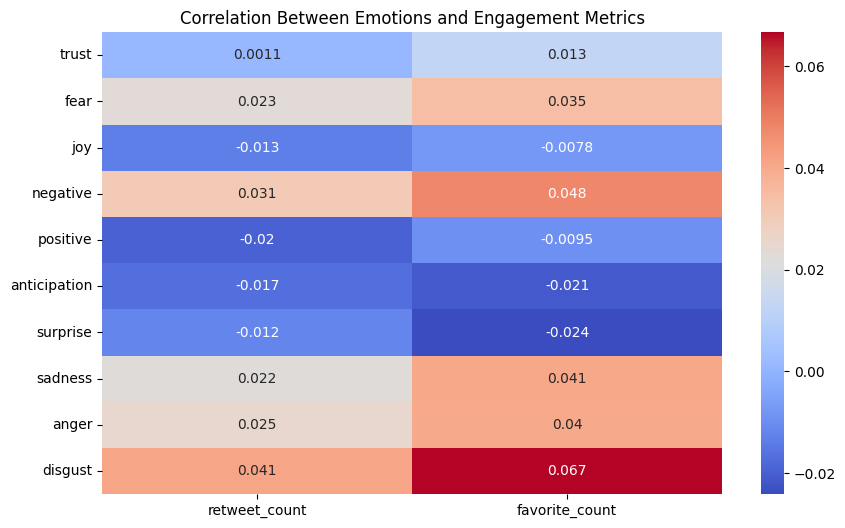

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
# Updated line below to use emotion_list for indexing instead of emotions
sns.heatmap(correlation_matrix[['retweet_count', 'favorite_count']].loc[emotion_list], annot=True, cmap='coolwarm')
plt.title("Correlation Between Emotions and Engagement Metrics")
plt.show()

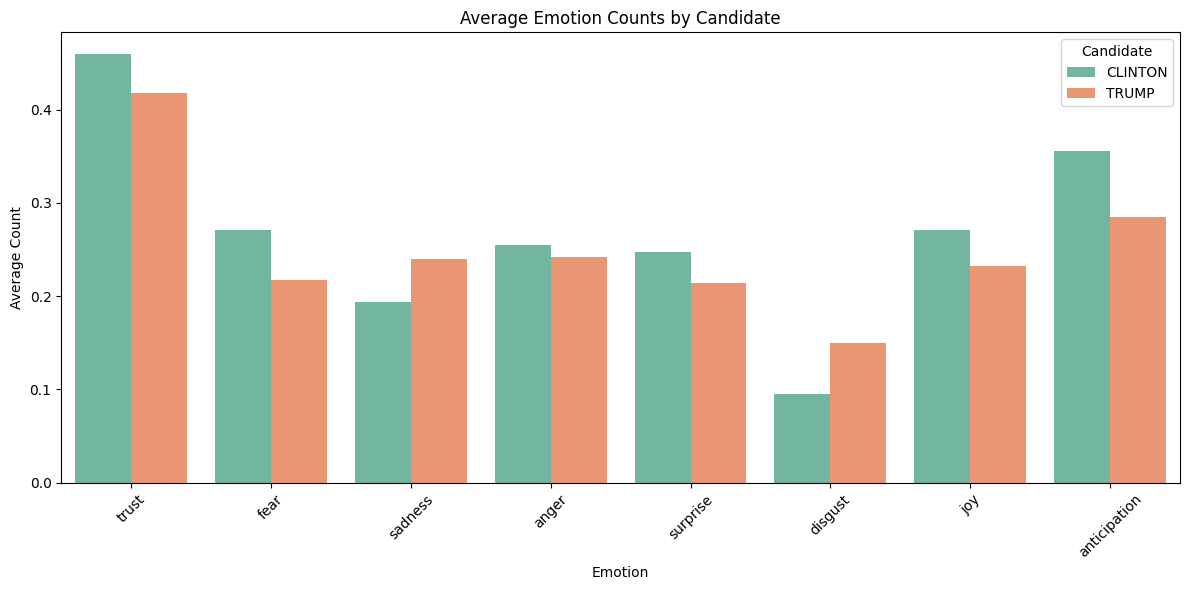

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

# Assuming your DataFrame is named `df`
# Convert the `sentiment_counter` column from string to dictionary (if needed)
df['sentiment_counter'] = df['sentiment_counter'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
# Extract emotion counts into separate columns
emotions = ['trust', 'fear', 'sadness', 'anger', 'surprise', 'disgust', 'joy', 'anticipation']
for emotion in emotions:
    df[emotion] = df['sentiment_counter'].apply(lambda x: x.get(emotion, 0))

# Group by candidate and calculate mean emotion counts
grouped = df.groupby('candidate')[emotions].mean().reset_index()

# Melt the DataFrame for easier plotting
melted = pd.melt(grouped, id_vars='candidate', value_vars=emotions, var_name='emotion', value_name='mean_count')

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='emotion', y='mean_count', hue='candidate', data=melted, palette='Set2')
plt.title('Average Emotion Counts by Candidate')
plt.xlabel('Emotion')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.legend(title='Candidate')
plt.tight_layout()
plt.show()

<ipython-input-34-9c64d956cc74>:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='emotion', y='average_engagement', hue='candidate', data=melted, palette='Set2', ci=None)


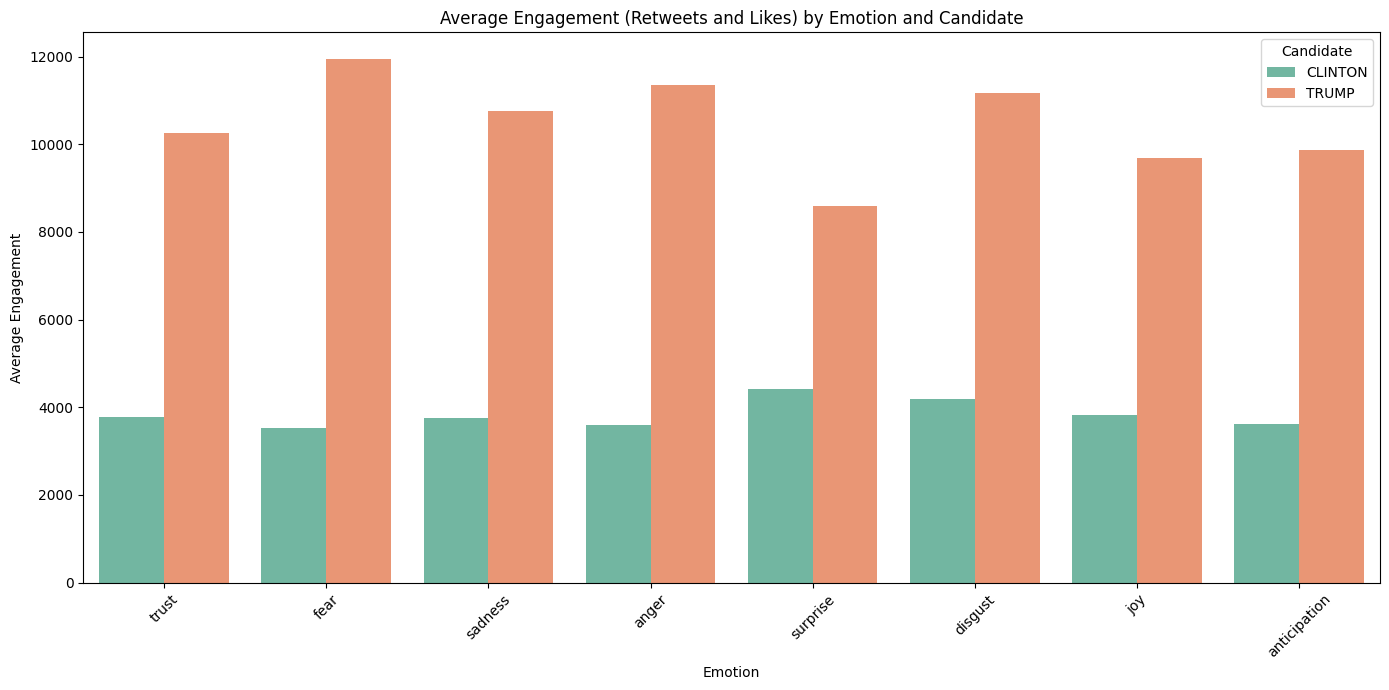

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Assuming your DataFrame is named `df`
# Convert the `sentiment_counter` column from string to dictionary (if needed)
df['sentiment_counter'] = df['sentiment_counter'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Extract emotion counts into separate columns
emotions = ['trust', 'fear', 'sadness', 'anger', 'surprise', 'disgust', 'joy', 'anticipation']
for emotion in emotions:
    df[emotion] = df['sentiment_counter'].apply(lambda x: x.get(emotion, 0))

# Calculate average engagement (retweets and likes) for each emotion and candidate
engagement_data = []
for emotion in emotions:
    for candidate in df['candidate'].unique():
        # Use .loc with boolean indexing for safe filtering
        filtered_df = df.loc[(df[emotion] > 0) & (df['candidate'] == candidate)]
        avg_retweets = filtered_df['retweet_count'].mean()
        avg_likes = filtered_df['favorite_count'].mean()
        engagement_data.append({
            'candidate': candidate,
            'emotion': emotion,
            'avg_retweets': avg_retweets,
            'avg_likes': avg_likes
        })

# Create a DataFrame from the engagement data
engagement_df = pd.DataFrame(engagement_data)

# Melt the DataFrame for easier plotting
melted = pd.melt(engagement_df, id_vars=['candidate', 'emotion'], value_vars=['avg_retweets', 'avg_likes'],
                 var_name='engagement_type', value_name='average_engagement')

# Plot the data
plt.figure(figsize=(14, 7))
sns.barplot(x='emotion', y='average_engagement', hue='candidate', data=melted, palette='Set2', ci=None)
plt.title('Average Engagement (Retweets and Likes) by Emotion and Candidate')
plt.xlabel('Emotion')
plt.ylabel('Average Engagement')
plt.xticks(rotation=45)
plt.legend(title='Candidate')
plt.tight_layout()
plt.show()

<ipython-input-35-c360ec3294ed>:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='emotion', y='average_engagement', hue='candidate', data=melted, palette='Set2', ci=None)


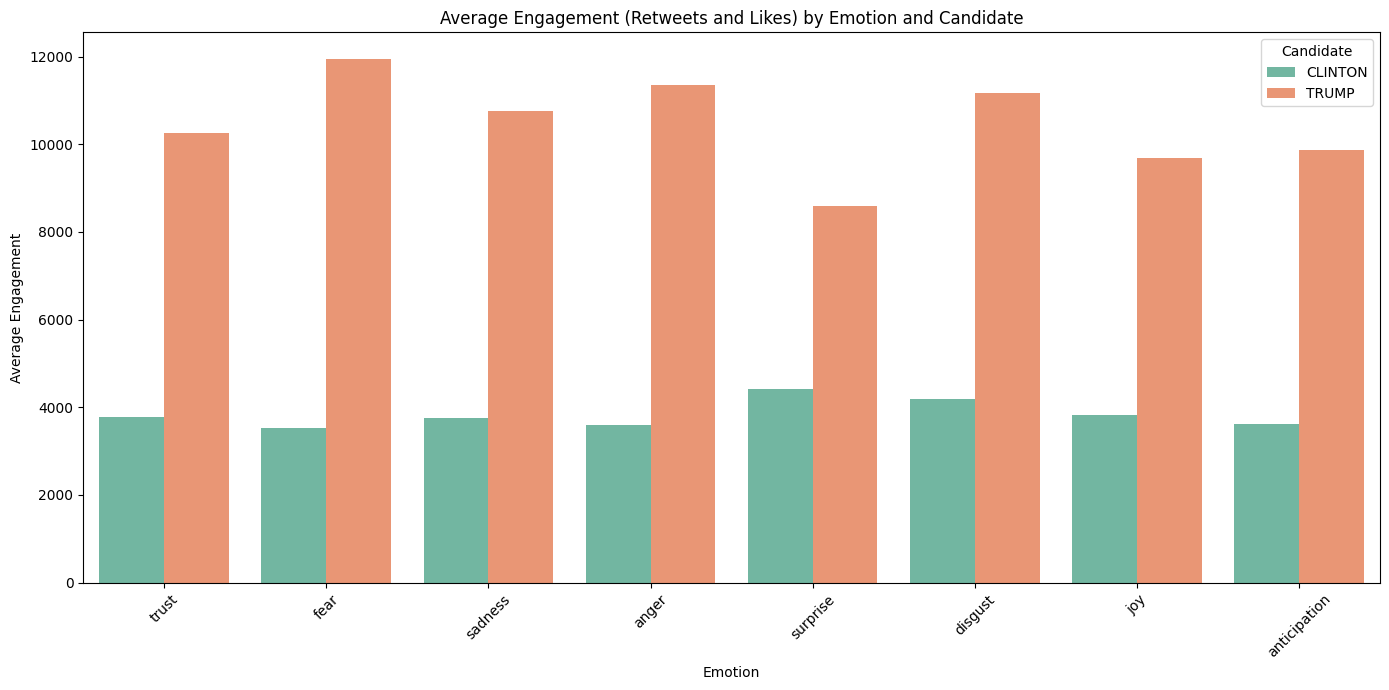

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Assuming your DataFrame is named `df`
# Convert the `sentiment_counter` column from string to dictionary (if needed)
df['sentiment_counter'] = df['sentiment_counter'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Extract emotion counts into separate columns
emotions = ['trust', 'fear', 'sadness', 'anger', 'surprise', 'disgust', 'joy', 'anticipation']
for emotion in emotions:
    df[emotion] = df['sentiment_counter'].apply(lambda x: x.get(emotion, 0))

# Calculate average engagement (retweets and likes) for each emotion and candidate
engagement_data = []
for emotion in emotions:
    for candidate in df['candidate'].unique():
        # Filter for the candidate AND emotion > 0 simultaneously
        filtered_df = df[(df['candidate'] == candidate) & (df[emotion] > 0)]
        avg_retweets = filtered_df['retweet_count'].mean()
        avg_likes = filtered_df['favorite_count'].mean()
        engagement_data.append({
            'candidate': candidate,
            'emotion': emotion,
            'avg_retweets': avg_retweets,
            'avg_likes': avg_likes
        })

# Create a DataFrame from the engagement data
engagement_df = pd.DataFrame(engagement_data)

# Melt the DataFrame for easier plotting
melted = pd.melt(engagement_df, id_vars=['candidate', 'emotion'], value_vars=['avg_retweets', 'avg_likes'],
                 var_name='engagement_type', value_name='average_engagement')

# Plot the data
plt.figure(figsize=(14, 7))
sns.barplot(x='emotion', y='average_engagement', hue='candidate', data=melted, palette='Set2', ci=None)
plt.title('Average Engagement (Retweets and Likes) by Emotion and Candidate')
plt.xlabel('Emotion')
plt.ylabel('Average Engagement')
plt.xticks(rotation=45)
plt.legend(title='Candidate')
plt.tight_layout()
plt.show()

#Is there a relationship between emotion categories and the number of retweets or favorites?

After conducting a correlational analysis and plotting the average engagement of retweets and likes by emotion and candidate it is clear that Trump gets higher engagement in his tweets. His greatest use of emotion is fear, while Clinton's tweets seem to reflect content that has a higher level of surprise. Clinton also generates more trust with twitter users. Overall we can predict that tweets with greater levels of intense emotion, posted by Donald Trump will have high engagement in comparison to Hilary Clinton.

In [ ]:
!apt-get install git
!git clone https://github.com/chloeecarlson/COMM158_final_Pork_Carlson.git

cp /content/COMM158_final_Pork_Carlson/COMM158_final_Pork_Carlson.ipynb /content/drive/MyDrive/

%cd /content/drive/MyDrive/

!git config --global chloeecarlson "Chloee Carlson"
!git config --global user.email "carlsonchloee@gmail.com"

!git add

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
!git clone https://github.com/chloeecarlson/COMM158_final_Pork_Carlson.git

!cp /content/COMM158_final_Pork_Carlson/COMM158_final_Pork_Carlson.ipynb /content/drive/MyDrive/

Cloning into 'COMM158_final_Pork_Carlson'...
fatal: could not read Username for 'https://github.com': No such device or address
cp: cannot stat '/content/COMM158_final_Pork_Carlson/COMM158_final_Pork_Carlson.ipynb': No such file or directory


In [ ]:
#######################################
### Part 3: Open Ended Explorations ###
#######################################

# Explore this dataset: What interesting patterns and insights do you see? What notable trends or relationships can you identify?
# Focus on formulating and testing hypotheses, rather than confirming or disproving them.

# Notes on grading criteria:
## Whether a hypothesis is confirmed or not is not the focus.
## Rather, ensure that your hypothesis is well-formed and that your code can legitimately test it.
## Results should be accurate—whether they are surprising or not does not impact grading.

# Since this is a group project with 2 or 3 members, the final report should contain 2 or 3 sets of explorations depending on the group size.
# Each member should be responsible for 1 set of exploration.
# Each set of exploration should contain:
## A brief summary paragraph of your exploration (research question, analysis method used, interpretation of results/plots)
## The code you write for this exploration
## Visualizing the results (at least 1 plot)

# For example, one big question you can ask is that:
# Can this Twitter dataset provide any indication that predicts the outcome of the election?

# To emphasize the importance of collaboration:
# At least two of exploration sets must build upon one another.
# This could mean extending previous findings, refining an analysis method, adding deeper insight to an initial result, etc.
# In your submission, include a few sentences explaining how analyses build upon one another.


